In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math

### **LABA_2_1**

In [ ]:

def convergence_condition(a, b, phi_func, diff_func):
    
    x_vals = np.linspace(a, b, 100)
    for x in x_vals:
        proiz_val = abs(float(diff_func.subs({x_sym: x})))
        func_val = phi_func.subs({x_sym: x})

        if proiz_val >= 1 or func_val < a or func_val > b:
            return False
        
    return True

def graph_1(a = 0.1, b = 2):
    x_vals = np.linspace(a, b, 400)
    y_vals_1_ = x_vals ** 3
    y_vals_2_ = np.cos(x_vals + 0.5)

    plt.plot(x_vals, y_vals_1_, label = r'$y = x^3$', color = 'r')
    plt.plot(x_vals, y_vals_2_, label = r'$y = cos(x + 0.5)$', color = 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title("Графики функций $x^3$ и $cos(x + 0.5)$")
    plt.show()

graph_1()

def graph_2(start, end, phi_func, diff_func):

    x_vals = np.linspace(start, end, 400)
    y_vals_for_phi = [phi_func.subs({x_sym: x}) for x in x_vals]
    y_vals_for_phi_diff = [diff_func.subs({x_sym: x}) for x in x_vals]


    plt.subplot(2, 1, 1)
    plt.plot(x_vals, y_vals_for_phi, label = r'$y = \sqrt[3]{cos(x + 0.5)}$', color = 'orange')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f"График итерационной функции на отрезке [{start}, {end}]")

    plt.subplot(2, 1, 2)
    plt.plot(x_vals, y_vals_for_phi_diff, label = r"$|\phi'(x)|$", color = 'purple')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f"График модуля производной $|\phi'(x)|$ на отрезке [{start}, {end}]")

    plt.tight_layout()
    plt.show()

def eps(e):
    return int(len(str(e).split('.')[1]))

def iteration_method(phi_func, epsilon, x_0):

    e = eps(epsilon) + 1
    i = 0
    print(f"x_{i} = {x_0:.{e}f}")
    x_1 = phi_func.subs({x_sym : x_0})
    diff = math.fabs(x_1 - x_0)
    
    while diff >= epsilon:
        print(f"|x_{i+1} - x_{i}| = {diff:.{e}f}")
        x_0 = x_1
        x_1 = phi_func.subs({x_sym : x_0})
        diff = math.fabs(x_1 - x_0)
        i += 1
        print(f"x_{i} = {x_0:.{e}f}")

    print(f"|x_{i} - x_{i-1}| = {diff:.{e}f}")

    if diff < epsilon:
        print(f"Условие выполнено: {diff:.{e}f} < {epsilon}")
        print(f"Приближенное решение: x = {x_1:.{e}f}")
    else:
        print("метод не сходится")

x_sym = sp.Symbol('x')
phi = sp.Pow(sp.cos(x_sym + 0.5), 1/3)
phi_diff = sp.diff(phi, x_sym)

a = float(input("Введите начало отрезка: "))
b = float(input("Введите конец отрезка: "))
e = float(input("Введите точность: "))
x_0 = a

graph_2(a, b, phi, phi_diff)

if convergence_condition:
    iteration_method(phi, e, x_0)
else:
    print("Метод не сходится на данном отрезке")



### **LABA_2_2**

In [ ]:
def method(a, b, func, diff_1, diff_2):

    if float(func.subs({x_sym: a})) * float(func.subs({x_sym: b})) >= 0:
        return False
    
    values = np.linspace(a, b, 1000)
    diff_1_vals = [diff_1.subs({x_sym : x}) for x in values]
    diff_2_vals = [diff_2.subs({x_sym: x}) for x in values]

    if not (all(diff_1_vals[i] <= diff_1_vals[i+1] for i in range(len(diff_1_vals)-1)) or all(diff_1_vals[i] <= diff_1_vals[i+1] for i in range(len(diff_1_vals)-1))):
        return False
    
    if not (all(diff_2_vals[i] <= diff_2_vals[i+1] for i in range(len(diff_2_vals)-1)) or all(diff_2_vals[i] <= diff_2_vals[i+1] for i in range(len(diff_2_vals)-1))):
        return False

    return True
def graph(a = 0.01, b = 2):
    x_vals = np.linspace(a, b, 400)
    y_vals_1_ = x_vals ** 3
    y_vals_2_ = np.cos(x_vals + 0.5)

    plt.plot(x_vals, y_vals_1_, label = r'$y = x^3$', color = 'r')
    plt.plot(x_vals, y_vals_2_, label = r'$y = cos(x + 0.5)$', color = 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title("Графики функций $x^3$ и $cos(x + 0.5)$")
    plt.show()
def eps(e):
    return int(len(str(e).split('.')[1])) + 1
def iterations(a, b, e, func, f_prime):
    a_0 = b
    b_0 = a
    a_1 = a_0
    b_1 = b_0
    i = 0
    print(f"Итерация {i}: a_{i} = {a_0:.{eps(e)}f}, b_{i} = {b_0:.{eps(e)}f}")
    print(f"|a_{i} - b_{i}| = {math.fabs(a_0 - b_0):.{eps(e)}f} >= {e}")
    print(f"x_{i} ≈ {(a_0 + b_0) / 2:.{eps(e)}f}")

    while math.fabs(a_1 - b_1) >= e:
        i += 1
        a_1 = a_0 - (func.subs({x_sym: a_0})/f_prime.subs({x_sym: a_0}))
        b_1 = b_0 - (func.subs({x_sym: b_0}) * (a_0 - b_0))/(func.subs({x_sym: a_0}) - func.subs({x_sym: b_0}))

        a_0, b_0 = a_1, b_1

        print(f"Итерация {i}: a_{i} = {a_1:.{eps(e)}f}, b_{i} = {b_1:.{eps(e)}f}")
        print(f"|a_{i} - b_{i}| = {math.fabs(a_1 - b_1):.{eps(e)}f} {'<=' if math.fabs(a_1 - b_1) < e else '>='} {e}")
        print(f"x_{i} ≈ {(a_1 + b_1) / 2:.{eps(e)}f}")
        print("----------------------")

    res = (a_1 + b_1)/2
    print(f"Приближенное решение: x ≈ {res:.{eps(e)}f} (с точностью {e})")
    sol_graph(a, b, a_1, b_1)
def sol_graph(a, b, x_res, y_res):
    x_vals = np.linspace(a, b, 400)
    y_vals_1_ = x_vals ** 3
    y_vals_2_ = np.cos(x_vals + 0.5)
    y_res = x_res**3
    plt.plot(x_vals, y_vals_1_, label = r'$y = x^3$', color = 'r')
    plt.plot(x_vals, y_vals_2_, label = r'$y = cos(x + 0.5)$', color = 'k')
    plt.scatter([x_res], [y_res], color='black', zorder=3, label=f'Решение ({x_res:.{dec_point}f}, {y_res:.{dec_point}f})')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title("График решения")
    plt.show()

x_sym = sp.Symbol('x')
func = sp.Pow(x_sym, 3) - sp.cos(x_sym + 0.5)
func_diff_1 = sp.diff(func, x_sym)
func_diff_2 = sp.diff(func_diff_1, x_sym)

a = float(input("Введите начало отрезка: "))
b = float(input("Введите конец отрезка: "))
epsilon = float(input("Введите точность: "))
dec_point = eps(epsilon)

graph()

if method(a, b, func, func_diff_1, func_diff_2):
    iterations(a, b, epsilon, func, func_diff_1)
else:
    print("Метод не сходится на данном отрезке")

### **LABA_3**

In [ ]:
x_sym = sp.Symbol('x')
y_sym = sp.Symbol('y')

func = 0.8 - sp.cos(y_sym+0.5)
func_diff_x = sp.diff(func, x_sym)
func_diff_y = sp.diff(func, y_sym)
phi = (1.6 - sp.sin(x_sym))/(-2)
phi_diff_x = sp.diff(phi, x_sym)
phi_diff_y = sp.diff(phi, y_sym)

def zero_approximation_graph(a = -2, b = 2):
    x_vals = np.linspace(a, b, 400)
    y_vals = np.linspace(a, b, 400)

    f_1 = sp.cos(y_sym + 0.5) + x_sym - 0.8
    f_2 = sp.sin(x_sym) - 2*y_sym - 1.6

    f_1_np = sp.lambdify((x_sym, y_sym), f_1, 'numpy')
    f_2_np = sp.lambdify((x_sym, y_sym), f_2, 'numpy')

    x_grid, y_grid = np.meshgrid(x_vals, y_vals)
    res_1 = f_1_np(x_grid, y_grid)
    res_2 = f_2_np(x_grid, y_grid)


    plt.axhline(0, color='black', linewidth=1.3, linestyle='-')  
    plt.axvline(0, color='black', linewidth=1.3, linestyle='-')
    plt.contour(x_grid, y_grid, res_1, levels = [0], color = 'purple')
    plt.contour(x_grid, y_grid, res_2, levels=[0], colors='red')
    plt.annotate(r'$\cos(y + 0.5) + x - 0.8 = 0$', xy=(-1.5, 0.5), color='purple', fontsize=10)
    plt.annotate(r'$\sin(x) - 2y - 1.6 = 0$', xy=(0.5, -1), color='red', fontsize=10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title("Метод итераций для решения системы нелинейных уравнений")
    plt.show()

def convergence_conditions(x_0, y_0):
    if func_diff_x.subs({x_sym: x_0}) > 1 or func_diff_y.subs({y_sym: y_0}) > 1:
        return False
    elif phi_diff_x.subs({x_sym: x_0}) > 1 or phi_diff_y.subs({y_sym: y_0}) > 1:
        return False
    
    return True

def eps(e):
    return int(len(str(e).split('.')[1])) + 1

def simple_iter(x_0, y_0, e):
    x, y = x_0, y_0
    i = 0
    dec_point = eps(e)
    x_new = func.subs({y_sym: y})
    y_new = phi.subs({x_sym: x})
    delta_x = sp.Abs(x - x_new)
    delta_y = sp.Abs(y - y_new)
    print(f"Шаг {i + 1}:")
    print(f"|x{i} - x{i+1}| = |{x:.{dec_point}f} - {x_new:.{dec_point}f}| = {delta_x:.{dec_point}f}")
    print(f"|y{i} - y{i+1}| = |{y:.{dec_point}f} - {y_new:.{dec_point}f}| = {delta_y:.{dec_point}f}\n")

    while delta_x > e or delta_y > e:
        i += 1
        x, y = x_new, y_new
        x_new = func.subs({y_sym: y})
        y_new = phi.subs({x_sym: x})
        delta_x = sp.Abs(x - x_new)
        delta_y = sp.Abs(y - y_new)
        print(f"Шаг {i + 1}:")
        print(f"|x{i} - x{i+1}| = |{x:.{dec_point}f} - {x_new:.{dec_point}f}| = {delta_x:.{dec_point}f}")
        print(f"|y{i} - y{i+1}| = |{y:.{dec_point}f} - {y_new:.{dec_point}f}| = {delta_y:.{dec_point}f}\n")

    print(f"Условия выполнены: |x{i} - x{i+1}| = {delta_x:.{dec_point}f} < {epsilon:.{dec_point}f}, |y{i} - y{i+1}| = {delta_y:.{dec_point}f} < {epsilon:.{dec_point}f}")
    return x_new, y_new

def solution_graph(a = -2, b = 2):
    x_vals = np.linspace(a, b, 400)
    y_vals = np.linspace(a, b, 400)

    f_1 = sp.cos(y_sym + 0.5) + x_sym - 0.8
    f_2 = sp.sin(x_sym) - 2*y_sym - 1.6

    f_1_np = sp.lambdify((x_sym, y_sym), f_1, 'numpy')
    f_2_np = sp.lambdify((x_sym, y_sym), f_2, 'numpy')

    x_grid, y_grid = np.meshgrid(x_vals, y_vals)
    res_1 = f_1_np(x_grid, y_grid)
    res_2 = f_2_np(x_grid, y_grid)


    plt.axhline(0, color='black', linewidth=1.3, linestyle='-')  
    plt.axvline(0, color='black', linewidth=1.3, linestyle='-')
    plt.contour(x_grid, y_grid, res_1, levels = [0], color = 'purple')
    plt.contour(x_grid, y_grid, res_2, levels=[0], colors='red')
    plt.scatter([x_res], [y_res], color='black', zorder=3, label=f'Решение ({x_res:.{dec_point}f}, {y_res:.{dec_point}f})')
    plt.annotate(r'$\cos(y + 0.5) + x - 0.8 = 0$', xy=(-1.5, 0.5), color='purple', fontsize=10)
    plt.annotate(r'$\sin(x) - 2y - 1.6 = 0$', xy=(0.5, -1), color='red', fontsize=10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title("Метод итераций для решения системы нелинейных уравнений")
    plt.show()
    
zero_approximation_graph()

x_0 = float(input("Введите начальное приближение x: "))
y_0 = float(input("Введите начальное приближение y: "))
epsilon = float(input("Введите точность epsilon: "))
dec_point = eps(epsilon)

if convergence_conditions(x_0, y_0):
    x_res, y_res = simple_iter(x_0, y_0, epsilon)

    print(f"Решение: x = {x_res:.{dec_point}f}, y = {y_res:.{dec_point}f}")

    solution_graph()
else:
    print('Не выполнены условия сходимости')

### **LABA_4**

In [ ]:
x_sym = sp.Symbol('x')
y_sym = sp.Symbol('y')
x_1 = sp.Symbol('x_1')
y_1 = sp.Symbol('y_1')

func = 0.8 - sp.cos(y_sym+0.5) - x_sym
func_diff_x = sp.diff(func, x_sym)
func_diff_y = sp.diff(func, y_sym)
phi = 1.6 - sp.sin(x_sym) + 2 * y_sym
phi_diff_x = sp.diff(phi, x_sym)
phi_diff_y = sp.diff(phi, y_sym)

def eps(e):
    return int(len(str(e).split('.')[1])) + 1

def jacobian(x_0, y_0, func, phi):
    F = sp.Matrix([func, phi])
    Jacobian = F.jacobian([x_sym, y_sym])
    det_Jacobian = Jacobian.det()
    det_Jacobian_at_start_points = det_Jacobian.subs({x_sym: x_0, y_sym: y_0})
    print(f"\nПроверка условия сходимости (определитель Якобиана): {sp.Abs(det_Jacobian_at_start_points):.{dec_point}f}")
    if sp.Abs(det_Jacobian_at_start_points) != 0:
        print("Условие сходимости выполнено")
        return True
    else:
        print("Условие сходимости не выполнено")
        return False

def slay(x_0, y_0):
    
    iteration = 0
    x, y = x_0, y_0
    eq_1 = func.subs({x_sym: x, y_sym: y}) + func_diff_x.subs({x_sym: x, y_sym: y}) * (x_1 - x) + func_diff_y.subs({x_sym: x, y_sym: y}) * (y_1 - y)
    eq_2 = phi.subs({x_sym: x, y_sym: y}) + phi_diff_x.subs({x_sym: x, y_sym: y}) * (x_1 - x) + phi_diff_y.subs({x_sym: x, y_sym: y}) * (y_1 - y)

    solution = sp.solve([eq_1, eq_2], (x_1, y_1))
    x_new = solution[x_1]  
    y_new = solution[y_1]
    delta_x = sp.Abs(x_new - x)
    delta_y = sp.Abs(y_new - y)
    print(f"Шаг {iteration + 1}:")
    print(f"x: {x:.{dec_point}f} -> {x_new:.{dec_point}f}, y: {y:.{dec_point}f} -> {y_new:.{dec_point}f}")
    print(f"|x{iteration+1} - x{iteration}| = |{x_new:.{dec_point}f} - {x:.{dec_point}f}| = {delta_x:.{dec_point}f}")
    print(f"|y{iteration+1} - y{iteration}| = |{y_new:.{dec_point}f} - {y:.{dec_point}f}| = {delta_y:.{dec_point}f}\n")
    
    while delta_x > epsilon or delta_y > epsilon:
        iteration += 1
        x, y = x_new, y_new
        eq_1 = func.subs({x_sym: x, y_sym: y}) + func_diff_x.subs({x_sym: x, y_sym: y}) * (x_1 - x) + func_diff_y.subs({x_sym: x, y_sym: y}) * (y_1 - y)
        eq_2 = phi.subs({x_sym: x, y_sym: y}) + phi_diff_x.subs({x_sym: x, y_sym: y}) * (x_1 - x) + phi_diff_y.subs({x_sym: x, y_sym: y}) * (y_1 - y)

        solution = sp.solve([eq_1, eq_2], (x_1, y_1))
        x_new = solution[x_1]  
        y_new = solution[y_1]
        delta_x = sp.Abs(x_new - x)
        delta_y = sp.Abs(y_new - y)
        print(f"Шаг {iteration + 1}:")
        print(f"x: {x:.{dec_point}f} -> {x_new:.{dec_point}f}, y: {y:.{dec_point}f} -> {y_new:.{dec_point}f}")
        print(f"|x{iteration+1} - x{iteration}| = |{x_new:.{dec_point}f} - {x:.{dec_point}f}| = {delta_x:.{dec_point}f}")
        print(f"|y{iteration+1} - y{iteration}| = |{y_new:.{dec_point}f} - {y:.{dec_point}f}| = {delta_y:.{dec_point}f}\n")
        if delta_x < epsilon and delta_y < epsilon:
            print(f"Условия выполнены: |x{iteration+1} - x{iteration}| = {delta_x:.{dec_point}f} < {epsilon:.{dec_point}f}, |y{iteration+1} - y{iteration}| = {delta_y:.{dec_point}f} < {epsilon:.{dec_point}f}")
            return x_new, y_new

def first_graph(a = -2, b = 2):
    x_vals = np.linspace(a, b, 400)
    y_vals = np.linspace(a, b, 400)

    f_1 = sp.cos(y_sym + 0.5) + x_sym - 0.8
    f_2 = sp.sin(x_sym) - 2*y_sym - 1.6

    f_1_np = sp.lambdify((x_sym, y_sym), f_1, 'numpy')
    f_2_np = sp.lambdify((x_sym, y_sym), f_2, 'numpy')

    x_grid, y_grid = np.meshgrid(x_vals, y_vals)
    res_1 = f_1_np(x_grid, y_grid)
    res_2 = f_2_np(x_grid, y_grid)


    plt.axhline(0, color='black', linewidth=1.3, linestyle='-')  
    plt.axvline(0, color='black', linewidth=1.3, linestyle='-')
    plt.contour(x_grid, y_grid, res_1, levels = [0], color = 'purple')
    plt.contour(x_grid, y_grid, res_2, levels=[0], colors='red')
    plt.annotate(r'$\cos(y + 0.5) + x - 0.8 = 0$', xy=(-1.5, 0.5), color='purple', fontsize=10)
    plt.annotate(r'$\sin(x) - 2y - 1.6 = 0$', xy=(0.5, -1), color='red', fontsize=10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title("График начального приближения")
    plt.show()

def solution_graph(a = -2, b = 2):
    x_vals = np.linspace(a, b, 400)
    y_vals = np.linspace(a, b, 400)

    f_1 = sp.cos(y_sym + 0.5) + x_sym - 0.8
    f_2 = sp.sin(x_sym) - 2*y_sym - 1.6

    f_1_np = sp.lambdify((x_sym, y_sym), f_1, 'numpy')
    f_2_np = sp.lambdify((x_sym, y_sym), f_2, 'numpy')

    x_grid, y_grid = np.meshgrid(x_vals, y_vals)
    res_1 = f_1_np(x_grid, y_grid)
    res_2 = f_2_np(x_grid, y_grid)


    plt.axhline(0, color='black', linewidth=1.3, linestyle='-')  
    plt.axvline(0, color='black', linewidth=1.3, linestyle='-')
    plt.contour(x_grid, y_grid, res_1, levels = [0], color = 'purple')
    plt.contour(x_grid, y_grid, res_2, levels=[0], colors='red')
    plt.scatter([x_res], [y_res], color='black', zorder=3, label=f'Решение ({x_res:.{dec_point}f}, {y_res:.{dec_point}f})')
    plt.annotate(r'$\cos(y + 0.5) + x - 0.8 = 0$', xy=(-1.5, 0.5), color='purple', fontsize=10)
    plt.annotate(r'$\sin(x) - 2y - 1.6 = 0$', xy=(0.5, -1), color='red', fontsize=10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title("График решения методом Ньютона")
    plt.show()

first_graph()

x_0 = float(input("Введите начальное приближение x: "))
y_0 = float(input("Введите начальное приближение y: "))
epsilon = float(input("Введите точность epsilon: "))
dec_point = eps(epsilon)

if jacobian(x_0, y_0, func, phi):
    x_sol, y_sol = slay(x_0, y_0)
    print(f"Решение: x = {x_sol:.{dec_point}f}, y = {y_sol:.{dec_point}f}")
    solution_graph()
else:
    print("Якобиан равен 0 -> метод Ньютона не сходится")



### **LABA_5**

Исходная таблица
x_0 = 0.0, y_0 = -1.86
x_1 = 0.5, y_1 = -2.15
x_2 = 1.0, y_2 = -2.57
x_3 = 1.5, y_3 = -3.25

Полином Лагранжа: L(x) = -0.173*x**3 + 3.55e-15*x**2 - 0.537*x - 1.86

Полином Ньютона: N(x) = -0.173*x**3 - 0.537*x - 1.86


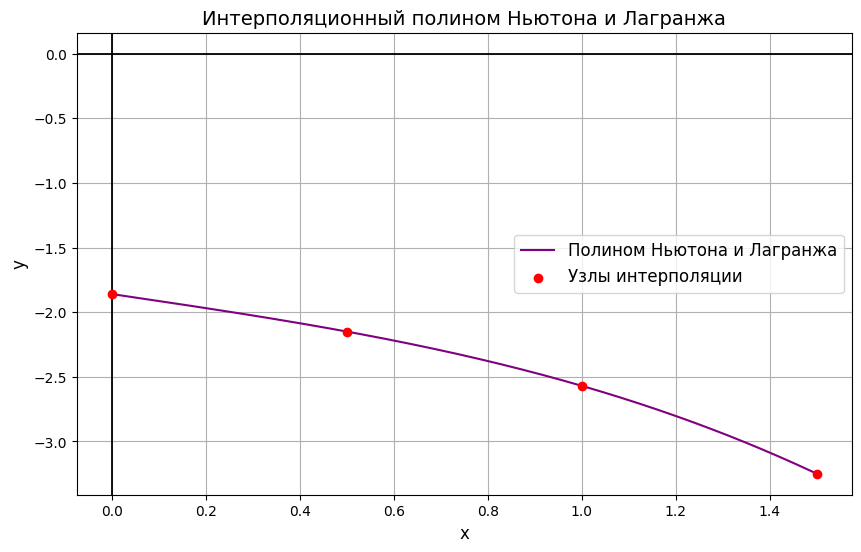

In [3]:
x_sym = sp.Symbol('x')
y_sym = sp.Symbol('y')


def start_table(x_vals, y_vals):
    print('Исходная таблица')
    for i in range(len(x_vals)):
        print(f"x_{i} = {x_vals[i]}, y_{i} = {y_vals[i]}")

def divided_1(i, x_vals, y_vals):
    res = y_vals[i]
    for j in range(len(x_vals)):
        if i != j:  
            res *= (x_sym - x_vals[j]) / (x_vals[i] - x_vals[j])
    return res

def Lagrange(x_vals, y_vals):
    summa = 0  
    for i in range(len(x_vals)):
        summa += divided_1(i, x_vals, y_vals)  
    return (sp.expand(summa)).evalf(3)

def divided_diff(x_vals, y_vals):
    n = len(x_vals)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y_vals

    for j in range(1, n):
        for i in range(n-j):
            diff_table[i][j] = (diff_table[i+1][j-1] - diff_table[i][j-1]) / (x_vals[i+j] - x_vals[i])
    return diff_table[0]

def Newton(x_vals, y_vals):
    coef = divided_diff(x_vals, y_vals)
    n = len(x_vals)
    polynom = coef[0]
    for i in range(1, n):
        temp = coef[i]
        for j in range(i):
            temp *= (x_sym - x_vals[j])
        polynom += temp

    return (sp.expand(polynom)).evalf(3)

def polinoms_graph(x_vals, y_vals):

    x_plot = np.linspace(min(x_vals), max(x_vals), 500)
    y_plot = newton_func(x_plot)

    plt.figure(figsize=(10, 6))
    plt.axhline(0, color='black', linewidth=1.3, linestyle='-')  
    plt.axvline(0, color='black', linewidth=1.3, linestyle='-')
    plt.plot(x_plot, y_plot, label="Полином Ньютона и Лагранжа", color='purple')  
    plt.scatter(x_vals, y_vals, color='red', label="Узлы интерполяции", zorder=3)  
    plt.title("Интерполяционный полином Ньютона и Лагранжа", fontsize=14)
    plt.xlabel("x", fontsize=12)
    plt.ylabel("y", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


x_vals = np.array([0, 0.5, 1, 1.5])
y_vals = np.array([-1.86, -2.15, -2.57, -3.25])

start_table(x_vals, y_vals)
lagrange = Lagrange(x_vals, y_vals)
Newton_polinom = Newton(x_vals, y_vals)
print(f"\nПолином Лагранжа: L(x) = {lagrange}")
print(f"\nПолином Ньютона: N(x) = {Newton_polinom}")

newton_poly = Newton(x_vals, y_vals)
newton_func = sp.lambdify(x_sym, newton_poly, "numpy")

polinoms_graph(x_vals, y_vals)

### **LABA_6**

In [4]:
from scipy.interpolate import CubicSpline

Значения сплайна в узловых точках: [-1.86 -2.15 -2.57 -3.25]
Исходные значения в узловых точках: [-1.86 -2.15 -2.57 -3.25]
Разница: [0. 0. 0. 0.]


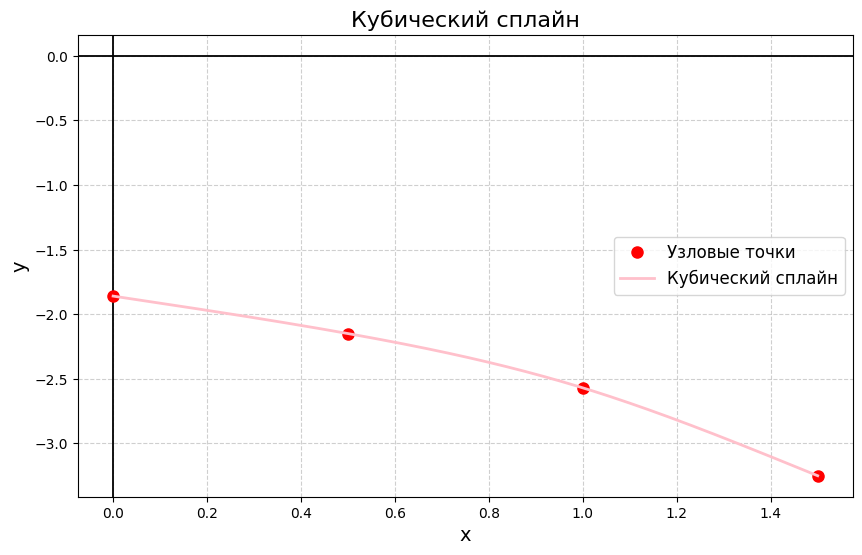


Коэффициенты сплайна:
Интервал [0.0, 0.5]:
 a = -0.139
 b = 0.000
 c = -0.545
 d = -1.860
Интервал [0.5, 1.0]:
 a = -0.347
 b = -0.208
 c = -0.649
 d = -2.150
Интервал [1.0, 1.5]:
 a = 0.485
 b = -0.728
 c = -1.117
 d = -2.570


In [5]:
x_vals = np.array([0, 0.5, 1, 1.5])
y_vals = np.array([-1.86, -2.15, -2.57, -3.25])
cubic_spline = CubicSpline(x_vals, y_vals, bc_type="natural")
cubic_spline_values = cubic_spline(x_vals)
def cubic_spline_graph():
    x = np.linspace(np.min(x_vals), np.max(x_vals), 300)
    y = cubic_spline(x)

    plt.figure(figsize=(10, 6))
    plt.axhline(0, color='black', linewidth=1.3, linestyle='-')  
    plt.axvline(0, color='black', linewidth=1.3, linestyle='-')
    plt.plot(x_vals, y_vals, 'ro', markersize=8, label='Узловые точки')
    plt.plot(x, y, color = 'pink', linewidth=2, label='Кубический сплайн')
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.title('Кубический сплайн', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
def spline_coef():
    print("\nКоэффициенты сплайна:")
    for i in range(len(x_vals) - 1):
        print(f"Интервал [{x_vals[i]}, {x_vals[i+1]}]:")
        print(f" a = {cubic_spline.c[0][i]:.3f}")
        print(f" b = {cubic_spline.c[1][i]:.3f}")
        print(f" c = {cubic_spline.c[2][i]:.3f}")
        print(f" d = {cubic_spline.c[3][i]:.3f}")
def spline_diff():
    print("Значения сплайна в узловых точках:", np.round(cubic_spline_values, 3))
    print("Исходные значения в узловых точках:", y_vals)
    print("Разница:", np.round(np.abs(cubic_spline_values - y_vals), 3))

spline_diff()
cubic_spline_graph()
spline_coef()

### **LABA_7**